In [2]:
import pandas as pd
from datetime import datetime
import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [3]:
import os
os.getcwd()

'C:\\Users\\Kamelia'

In [4]:
os.chdir('E:\\Summer school 2019\\Case study')

In [5]:
cat_tree = pd.read_csv("E:\\Summer school 2019\\Case study\\data\\category_tree.csv")
events = pd.read_csv("E:\\Summer school 2019\\Case study\\data\\events.csv")
item1 = pd.read_csv("E:\\Summer school 2019\\Case study\\data\\item_properties_part1.csv")
item2 = pd.read_csv("E:\\Summer school 2019\\Case study\\data\\item_properties_part2.csv")

In [8]:
cat_tree.head()

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


In [11]:
events.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [25]:
events.describe()

,timestamp,visitorid,itemid,transactionid
count,2.756101e+06,2.756101e+06,2.756101e+06,22457.000000
mean,1.436424e+12,7.019229e+05,2.349225e+05,8826.497796
std,3.366312e+09,4.056875e+05,1.341954e+05,5098.996290
min,1.430622e+12,0.000000e+00,3.000000e+00,0.000000
25%,1.433478e+12,3.505660e+05,1.181200e+05,4411.000000
50%,1.436453e+12,7.020600e+05,2.360670e+05,8813.000000
75%,1.439225e+12,1.053437e+06,3.507150e+05,13224.000000
max,1.442545e+12,1.407579e+06,4.668670e+05,17671.000000


In [32]:
events.shape

(2756101, 5)

In [12]:
item1.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


In [13]:
item2.head()

,timestamp,itemid,property,value
0,1433041200000,183478,561,769062
1,1439694000000,132256,976,n26.400 1135780
2,1435460400000,420307,921,1149317 1257525
3,1431831600000,403324,917,1204143
4,1435460400000,230701,521,769062


In [6]:
item = pd.concat([item1, item2])

In [17]:
item.describe()
# in property and value there are other values than numeric

,timestamp,itemid
count,2.027590e+07,2.027590e+07
mean,1.435157e+12,2.333904e+05
std,3.327798e+09,1.348452e+05
min,1.431227e+12,0.000000e+00
25%,1.432436e+12,1.165160e+05
50%,1.433646e+12,2.334830e+05
75%,1.437880e+12,3.503040e+05
max,1.442113e+12,4.668660e+05


In [18]:
item.dtypes

timestamp     int64
itemid        int64
property     object
value        object
dtype: object

In [31]:
item.shape

(20275902, 4)

In [ ]:
#df = item[item.applymap(lambda x: 'a' in x).any(axis=1)]

In [7]:
df = item[item.property.str.contains('categoryid')]

In [44]:
df.shape

(788214, 4)

In [45]:
df.describe()

,timestamp,itemid
count,7.882140e+05,788214.000000
mean,1.434702e+12,233407.589098
std,3.447773e+09,134695.630898
min,1.431227e+12,0.000000
25%,1.431227e+12,117203.250000
50%,1.433646e+12,232760.500000
75%,1.437275e+12,350257.750000
max,1.442113e+12,466866.000000


In [131]:
df.iloc[1:100]

,timestamp,itemid,property,value
140,1432436400000,281245,categoryid,1277
151,1435460400000,35575,categoryid,1059
189,1437274800000,8313,categoryid,1147
197,1437879600000,55102,categoryid,47
213,1433041200000,397079,categoryid,619
237,1436670000000,265036,categoryid,1228
254,1437879600000,124459,categoryid,1277
310,1437879600000,350508,categoryid,546
325,1439089200000,221365,categoryid,1226
359,1440298800000,232979,categoryid,1026


In [8]:
df1 = df.drop(['property'], axis = 1)

In [61]:
df1.value.unique().shape

(1242,)

In [62]:
df1.itemid.unique().shape

(417053,)

In [9]:
df2 = df1.drop(['timestamp'], axis = 1)

In [10]:
df2 = df.drop_duplicates()

In [57]:
df1.shape

(442432, 2)

In [12]:
df2.itemid.unique().shape

(417053,)

In [ ]:
# there are duplicates - for one item there are several categories
# work with df1

In [11]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'], unit = 'ms')
df1['no_week'] = df1['timestamp'].dt.week
df1.head()

,timestamp,itemid,value,no_week
0,2015-06-28 03:00:00,460429,1338,26
140,2015-05-24 03:00:00,281245,1277,21
151,2015-06-28 03:00:00,35575,1059,26
189,2015-07-19 03:00:00,8313,1147,29
197,2015-07-26 03:00:00,55102,47,30


In [12]:
events['timestamp'] = pd.to_datetime(events['timestamp'], unit = 'ms')
events['no_week'] = events['timestamp'].dt.week
events.head()

,timestamp,visitorid,event,itemid,transactionid,no_week
0,2015-06-02 05:02:12.117,257597,view,355908,NaN,23
1,2015-06-02 05:50:14.164,992329,view,248676,NaN,23
2,2015-06-02 05:13:19.827,111016,view,318965,NaN,23
3,2015-06-02 05:12:35.914,483717,view,253185,NaN,23
4,2015-06-02 05:02:17.106,951259,view,367447,NaN,23


In [13]:
ev = pd.merge(events,df1, how='left', on=['itemid', 'no_week'])

In [87]:
ev.shape

(2756101, 8)

In [65]:
cat_tree2 = pd.read_csv("E:\\Summer school 2019\\Case study\\data\\category_tree_table_niki_right_align.csv")

In [66]:
cat_tree2.dtypes

m1    float64
m2    float64
m3    float64
m4    float64
m5    float64
m6      int64
dtype: object

In [67]:
cat_tree2.rename(columns={'m6':'value'}, inplace=True)

In [68]:
cat_tree2.dtypes

m1       float64
m2       float64
m3       float64
m4       float64
m5       float64
value      int64
dtype: object

In [88]:
ev.dtypes

timestamp_x      datetime64[ns]
visitorid                 int64
event                    object
itemid                    int64
transactionid           float64
no_week                   int64
timestamp_y      datetime64[ns]
value                    object
dtype: object

In [14]:
ev_na = ev[ev['value'].isna()]

In [110]:
ev_na.shape

(2458485, 8)

In [15]:
ev_f = ev[ev['value'].isna() == False]

In [112]:
ev_f.shape

(297616, 8)

In [113]:
ev_na.iloc[1:10]

,timestamp_x,visitorid,event,itemid,transactionid,no_week,timestamp_y,value
1,2015-06-02 05:50:14.164,992329,view,248676,NaN,23,NaT,NaN
2,2015-06-02 05:13:19.827,111016,view,318965,NaN,23,NaT,NaN
3,2015-06-02 05:12:35.914,483717,view,253185,NaN,23,NaT,NaN
5,2015-06-02 05:48:06.234,972639,view,22556,NaN,23,NaT,NaN
6,2015-06-02 05:12:03.240,810725,view,443030,NaN,23,NaT,NaN
7,2015-06-02 05:34:51.897,794181,view,439202,NaN,23,NaT,NaN
8,2015-06-02 04:54:59.221,824915,view,428805,NaN,23,NaT,NaN
9,2015-06-02 05:00:04.592,339335,view,82389,NaN,23,NaT,NaN
10,2015-06-02 05:16:02.373,176446,view,10572,NaN,23,NaT,NaN


In [114]:
ev_f.iloc[1:10]

,timestamp_x,visitorid,event,itemid,transactionid,no_week,timestamp_y,value
12,2015-06-02 05:50:29.496,15795,view,44872,NaN,23,2015-06-07 03:00:00,834
17,2015-06-02 05:33:56.124,287857,addtocart,5206,NaN,23,2015-06-07 03:00:00,927
20,2015-06-02 05:47:50.841,1398644,view,135256,NaN,23,2015-06-07 03:00:00,421
22,2015-06-02 05:01:14.809,1213673,view,343861,NaN,23,2015-06-07 03:00:00,1120
31,2015-06-02 05:03:00.636,849453,view,123990,NaN,23,2015-06-07 03:00:00,535
41,2015-06-02 05:07:02.167,1342963,view,306886,NaN,23,2015-06-07 03:00:00,1613
65,2015-06-02 05:31:16.406,1262470,view,102986,NaN,23,2015-06-07 03:00:00,929
67,2015-06-02 05:19:26.959,238317,view,348196,NaN,23,2015-06-07 03:00:00,1558
79,2015-06-02 05:49:05.724,854656,view,87947,NaN,23,2015-06-07 03:00:00,1385


In [117]:
ev_f.event.unique()

array(['view', 'addtocart', 'transaction'], dtype=object)

In [16]:
# sort by visitorid and get only addtocart and transaction
ev_f_sorted = ev_f.sort_values(by=['visitorid'])

In [125]:
ev_f_sorted.iloc[1:10]

,timestamp_x,visitorid,event,itemid,transactionid,no_week,timestamp_y,value
1309856,2015-09-10 02:01:25.703,15,view,22495,NaN,37,2015-09-13 03:00:00,807
1172911,2015-09-01 20:44:53.471,18,view,209302,NaN,36,2015-09-06 03:00:00,1574
777037,2015-08-10 08:09:48.141,30,view,425758,NaN,33,2015-08-16 03:00:00,72
2518003,2015-07-21 15:34:12.502,31,view,465565,NaN,30,2015-07-26 03:00:00,528
1630795,2015-05-12 03:37:24.989,44,view,11729,NaN,20,2015-05-17 03:00:00,929
1238740,2015-09-05 23:23:36.363,51,view,429304,NaN,36,2015-09-06 03:00:00,438
1245088,2015-09-05 23:26:22.729,51,view,198762,NaN,36,2015-09-06 03:00:00,438
1236332,2015-09-05 23:27:14.886,51,view,49967,NaN,36,2015-09-06 03:00:00,438
1241247,2015-09-05 23:21:58.252,51,view,198762,NaN,36,2015-09-06 03:00:00,438


In [17]:
filter_list = ['addtocart', 'transaction']
test = ev_f_sorted[ev_f_sorted.event.isin(filter_list)]

In [127]:
test.shape

(10201, 8)

In [128]:
test.groupby('visitorid').count()

,timestamp_x,event,itemid,transactionid,no_week,timestamp_y,value
visitorid,,,,,,,
186,2,2,2,1,2,2,2
302,1,1,1,0,1,1,1
318,1,1,1,0,1,1,1
379,1,1,1,0,1,1,1
420,1,1,1,0,1,1,1
795,2,2,2,1,2,2,2
1399,2,2,2,0,2,2,2
1658,1,1,1,0,1,1,1
1936,1,1,1,0,1,1,1


In [130]:
test[test['visitorid'] == 4115]

,timestamp_x,visitorid,event,itemid,transactionid,no_week,timestamp_y,value
517726,2015-06-27 19:26:53.401,4115,addtocart,98467,NaN,26,2015-06-28 03:00:00,1613
522819,2015-06-27 19:32:36.446,4115,transaction,98467,15885.0,26,2015-06-28 03:00:00,1613
528252,2015-06-27 19:08:46.342,4115,addtocart,98467,NaN,26,2015-06-28 03:00:00,1613
522824,2015-06-27 19:06:38.644,4115,addtocart,403576,NaN,26,2015-06-28 03:00:00,1613


In [18]:
# take only visitors and their item ids
vis_item = test[['visitorid', 'itemid']].copy()

In [19]:
vid_item_dist = vis_item.drop_duplicates()

In [134]:
vid_item_dist.shape

(7232, 2)

In [158]:
vid_item_dist.dtypes

visitorid    int64
itemid       int64
dtype: object

In [174]:
len(vid_item_dist.itemid.value_counts())

3953

In [20]:
# change type to text
vid_item_dist = vid_item_dist.applymap(str)

In [160]:
vid_item_dist.dtypes

visitorid    object
itemid       object
dtype: object

In [21]:
test1 = vid_item_dist.groupby('visitorid')['itemid'].apply(list)

In [163]:
test1.head()

visitorid
1000103            [440560]
1000306    [118215, 102478]
1000334            [126503]
1000384            [136523]
1000593              [3629]
Name: itemid, dtype: object

In [22]:
df_f = []
for i in range(test1.shape[0]):
    df_f.append(test1.iloc[i])

In [23]:
df_f

[['440560'],
 ['118215', '102478'],
 ['126503'],
 ['136523'],
 ['3629'],
 ['381934'],
 ['403576'],
 ['230931', '60166'],
 ['417059'],
 ['438554'],
 ['320130'],
 ['211157', '454856', '69261', '76812'],
 ['22623'],
 ['111045'],
 ['149308'],
 ['245158'],
 ['260282'],
 ['98425'],
 ['150940'],
 ['95977', '446506'],
 ['381387'],
 ['356316'],
 ['291877'],
 ['167978'],
 ['98467'],
 ['368488'],
 ['113535'],
 ['193488'],
 ['350006'],
 ['144350'],
 ['304081', '182302'],
 ['25332'],
 ['355484', '352096'],
 ['59003'],
 ['31331', '8512'],
 ['153492'],
 ['107972'],
 ['216019'],
 ['62737'],
 ['247909', '282298'],
 ['127978'],
 ['94777'],
 ['301682'],
 ['56782'],
 ['305588', '213576', '275937'],
 ['271321'],
 ['239020'],
 ['360487'],
 ['187138'],
 ['338318'],
 ['129191', '219634', '424279'],
 ['368060'],
 ['202699'],
 ['222097'],
 ['446978'],
 ['185117'],
 ['320130'],
 ['255380'],
 ['91708'],
 ['322642', '255728'],
 ['290045'],
 ['111530'],
 ['232312', '248547'],
 ['390403'],
 ['129895'],
 ['27494', '2

In [167]:
test1.iloc[0]

['440560']

In [24]:
# word2vec model
model = gensim.models.Word2Vec(df_f)

C:\Users\Kamelia\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [26]:
word2vec = Word2Vec(df_f, min_count=1)  

In [27]:
vocabulary = word2vec.wv.vocab  
print(vocabulary)  

{'440560': <gensim.models.keyedvectors.Vocab object at 0x0000019314372710>, '118215': <gensim.models.keyedvectors.Vocab object at 0x00000193143726D8>, '102478': <gensim.models.keyedvectors.Vocab object at 0x00000193143726A0>, '126503': <gensim.models.keyedvectors.Vocab object at 0x0000019314372668>, '136523': <gensim.models.keyedvectors.Vocab object at 0x0000019314372940>, '3629': <gensim.models.keyedvectors.Vocab object at 0x0000019314372978>, '381934': <gensim.models.keyedvectors.Vocab object at 0x00000193143729B0>, '403576': <gensim.models.keyedvectors.Vocab object at 0x0000019314372748>, '230931': <gensim.models.keyedvectors.Vocab object at 0x0000019314372780>, '60166': <gensim.models.keyedvectors.Vocab object at 0x00000193143727B8>, '417059': <gensim.models.keyedvectors.Vocab object at 0x00000193143727F0>, '438554': <gensim.models.keyedvectors.Vocab object at 0x0000019314372828>, '320130': <gensim.models.keyedvectors.Vocab object at 0x0000019314372860>, '211157': <gensim.models.ke

In [28]:
len(vocabulary)

3953

In [178]:
v1 = word2vec.wv['123441'] # coefficients

In [179]:
print(v1)

[-4.8261513e-03  4.4639776e-03  2.6526107e-03 -1.6739067e-03
  4.7484585e-03  1.3418774e-03  2.3997403e-03  4.8672706e-03
 -4.0832101e-03 -1.5489662e-04 -3.7451084e-03  4.6699690e-03
 -3.9320046e-04  1.3588964e-03  1.0466272e-03 -1.7167615e-03
  7.3458487e-04 -4.7675562e-03  2.5022975e-03 -1.1219254e-03
 -1.4483804e-03 -4.4528199e-03 -8.4491872e-04 -4.1180891e-03
  4.3164361e-03 -8.0690515e-04  2.3578422e-03  3.4203005e-03
  4.5072255e-03 -1.3746552e-03  3.7791918e-03 -1.1351599e-03
 -3.3383069e-03  4.2166696e-03  2.5958514e-03 -4.2963475e-03
 -3.8842137e-03  3.1123159e-03  3.0181366e-03  2.0881058e-03
  8.7089872e-04 -4.6535800e-03  2.7707373e-03  2.0010662e-03
 -4.7846898e-03 -9.9733072e-05 -3.2155574e-03  2.8555747e-03
 -1.1433370e-03 -2.0526678e-03 -3.6460201e-03 -1.0699583e-03
 -4.4105973e-04  6.4879983e-05  2.0013636e-03 -3.1161058e-04
 -3.4647270e-03 -3.7488129e-03  3.9629568e-03  2.5297396e-03
  1.9277441e-03 -1.4960623e-03 -1.1493488e-03 -3.5331319e-03
 -3.4369193e-03 -2.30561

In [180]:
sim_words = word2vec.wv.most_similar('123441') # similarity index

In [181]:
print(sim_words)

[('45727', 0.334730863571167), ('270283', 0.3195377588272095), ('358565', 0.31113624572753906), ('344616', 0.3071662187576294), ('464385', 0.30352506041526794), ('446331', 0.30310964584350586), ('187354', 0.30144476890563965), ('102673', 0.2953774034976959), ('244285', 0.2898024022579193), ('464751', 0.2871525287628174)]


In [29]:
# put vocabulary in a list
vocab = list(model.wv.vocab)
X = model[vocab]

C:\Users\Kamelia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
# dimensionality reduction
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [31]:
ff = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

In [189]:
ff.head()
# visitorid is index

,x,y
136523,1.319114,2.531712
403576,4.833763,5.012306
230931,2.895697,5.221858
417059,5.046583,1.748294
438554,-5.676251,-3.831763


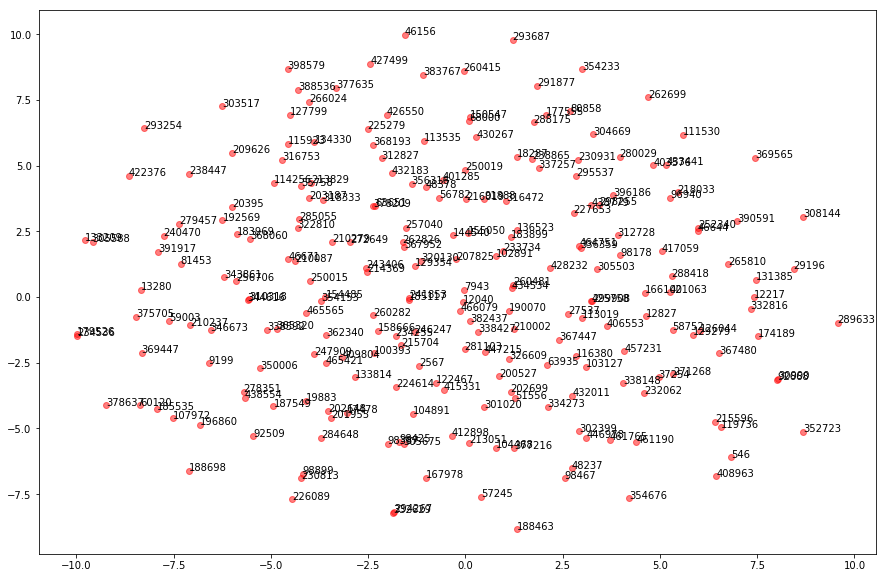

In [212]:
#fig, ax = plt.subplots()
#ax.scatter(ff['x'], ff['y'])
plt.figure(figsize=(15,10))
plt.plot(ff['x'], ff['y'], 'ro', alpha = 0.5)

for i in range(len(ff)):
    plt.text(ff.x.iloc[i], ff.y.iloc[i], str(ff.index[i]))
    
plt.show()

In [51]:
def get_input():
    answer1= input("Customer ID? ")
    
    if answer1 in test1.index:
        print('Old customer')
        
    else: print("New customer")
        
    return answer1

In [94]:
def recommend(customerid):
    c =  test1[test1.index.isin([customerid])]
    prod = c[0]
    
    for i, p in enumerate(prod):
        sim_words = word2vec.wv.most_similar(p)
        print("\n")
        print("Bought product:", prod[i], "\n")
        for j in range(len(sim_words)):
            print("Recommended Product ID:", sim_words[j][0])
            print("Similarity index:", sim_words[j][1])

In [85]:
test1[0:10]

visitorid
1000103            [440560]
1000306    [118215, 102478]
1000334            [126503]
1000384            [136523]
1000593              [3629]
1000648            [381934]
1000782            [403576]
1000952     [230931, 60166]
100104             [417059]
1001299            [438554]
Name: itemid, dtype: object

In [86]:
# input should be without ''
answer=get_input()

Customer ID? 1000306
Old customer


In [95]:
recommend(customerid=answer)



Bought product: 118215 

Recommended Product ID: 369158
Similarity index: 0.3147122263908386
Recommended Product ID: 174417
Similarity index: 0.3110402226448059
Recommended Product ID: 169147
Similarity index: 0.3109191358089447
Recommended Product ID: 38483
Similarity index: 0.3107454478740692
Recommended Product ID: 301013
Similarity index: 0.31073591113090515
Recommended Product ID: 180492
Similarity index: 0.29396408796310425
Recommended Product ID: 293737
Similarity index: 0.28802281618118286
Recommended Product ID: 314201
Similarity index: 0.2847787141799927
Recommended Product ID: 115663
Similarity index: 0.2838778495788574
Recommended Product ID: 444666
Similarity index: 0.27890506386756897


Bought product: 102478 

Recommended Product ID: 405889
Similarity index: 0.3568844795227051
Recommended Product ID: 340808
Similarity index: 0.3113323450088501
Recommended Product ID: 122041
Similarity index: 0.30691468715667725
Recommended Product ID: 214441
Similarity index: 0.3062582

In [80]:
ev1 = pd.merge(test,cat_tree2, how='left', on='value')

In [81]:
ev1.dtypes

value      int32
m1       float64
m2       float64
m3       float64
m4       float64
m5       float64
dtype: object

In [82]:
ev1.shape

(297616, 6)

In [84]:
ev1.head()

,value,m1,m2,m3,m4,m5
0,1613,NaN,NaN,NaN,NaN,250.0
1,834,NaN,NaN,NaN,1579.0,1056.0
2,927,NaN,NaN,NaN,1482.0,605.0
3,421,NaN,NaN,NaN,679.0,1424.0
4,1120,NaN,NaN,NaN,NaN,NaN


In [85]:
ev1['value'].unique

<bound method Series.unique of 0         1613
1          834
2          927
3          421
4         1120
5          535
6         1613
7          929
8         1558
9         1385
10         834
11        1613
12          51
13        1167
14         535
15        1454
16         463
17        1529
18        1613
19         532
20        1509
21        1253
22        1613
23        1554
24        1173
25         842
26        1120
27        1277
28        1167
29        1402
          ... 
297586    1120
297587    1613
297588    1613
297589    1613
297590    1613
297591    1228
297592    1355
297593    1613
297594    1589
297595    1509
297596    1613
297597     256
297598    1120
297599     478
297600    1355
297601    1613
297602     256
297603     822
297604    1509
297605    1277
297606    1613
297607     861
297608    1120
297609     496
297610    1679
297611    1613
297612     546
297613    1277
297614     238
297615     256
Name: value, Length: 297616, dtype: int32>

In [93]:
df1['no_week'].unique

<bound method Series.unique of 0          26
140        21
151        26
189        29
197        30
213        22
237        28
254        30
310        30
325        32
359        34
360        19
364        36
408        22
466        22
490        35
498        22
504        36
519        35
543        19
551        22
632        31
655        31
674        35
696        19
721        19
726        19
744        23
766        19
780        26
           ..
9275002    19
9275067    33
9275068    30
9275070    29
9275181    27
9275191    23
9275224    26
9275255    26
9275269    29
9275287    19
9275299    24
9275308    19
9275346    30
9275379    30
9275386    19
9275412    22
9275445    26
9275446    24
9275475    22
9275503    34
9275532    19
9275615    19
9275650    28
9275659    22
9275697    19
9275798    23
9275823    19
9275831    30
9275873    26
9275879    26
Name: no_week, Length: 788214, dtype: int64>